In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tilak\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

--- Step 1: Data Loaded Successfully ---
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


--- Step 2: Text Preprocessing Setup Complete ---

--- Step 3: Feature Extraction & Splitting Complete ---

--- Step 4: Model Training Complete ---

--- Step 5: Model Evaluation ---
Model Accuracy: 0.9848

Classification Report:
                precision    recall  f1-score   support

Ham (Not Spam)       0.99      1.00      0.99       966
          Spam       0.98      0.91      0.94       149

      accuracy                           0.98      1115
     macro avg       0.98      0.95      0.97      1115
  weighted avg       0.98      0.98      0.98      1115


Confusion matrix saved as 's

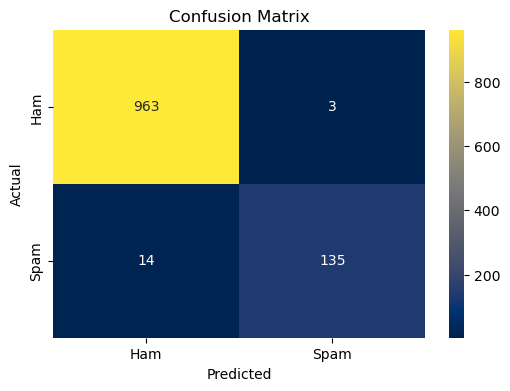

In [2]:
import pandas as pd
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load the Data ---
# We'll use a popular public dataset of SMS messages.
try:
    url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
    df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])
    # Convert labels to numerical format: 0 for 'ham' (not spam), 1 for 'spam'
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})
    print("--- Step 1: Data Loaded Successfully ---")
    print(df.head())
    print("\n")

    # --- Step 2: Text Preprocessing ---
    # This function removes punctuation and stopwords from a message.
    def text_process(mess):
        """
        1. Remove punctuation
        2. Remove stopwords
        3. Return a list of clean words
        """
        NO_PUNC = [char for char in mess if char not in string.punctuation]
        NO_PUNC = ''.join(NO_PUNC)
        return [word for word in NO_PUNC.split() if word.lower() not in stopwords.words('english')]

    print("--- Step 2: Text Preprocessing Setup Complete ---\n")

    # --- Step 3: Feature Extraction & Data Splitting ---
    # Split the data into features (X) and target (y)
    X = df['message']
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Convert text messages into a matrix of token counts using our preprocessing function
    count_vectorizer = CountVectorizer(analyzer=text_process)
    X_train_counts = count_vectorizer.fit_transform(X_train)
    X_test_counts = count_vectorizer.transform(X_test)
    print("--- Step 3: Feature Extraction & Splitting Complete ---\n")

    # --- Step 4: Train the Naive Bayes Model ---
    # Use the Multinomial Naive Bayes classifier
    nb_model = MultinomialNB()
    nb_model.fit(X_train_counts, y_train)
    print("--- Step 4: Model Training Complete ---\n")

    # --- Step 5: Evaluate the Model ---
    y_pred = nb_model.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Step 5: Model Evaluation ---")
    print(f"Model Accuracy: {accuracy:.4f}")
    
    # Precision and Recall are crucial for spam detection
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Ham (Not Spam)', 'Spam']))
    
    # Generate and save the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', 
                xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('spam_confusion_matrix.png')
    print("\nConfusion matrix saved as 'spam_confusion_matrix.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")